# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Agus Irvan Maulana
- **Email:** agusirvan2708@gmail.com
- **ID Dicoding:** agusirvanmaulana

## Menentukan Pertanyaan Bisnis

- Pada bulan apa sepeda mengalami penurunan ?
-  Perbandingan rata-rata peminjaman sepeda berdasarkan hari kerja dan libur ?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [21]:
#Load Dataset
day=pd.read_csv('day.csv')
#Load Dataset
day=pd.read_csv('day.csv')
hour=pd.read_csv('hour.csv')
#gabung dataset dengan merge
df=pd.merge(day,hour,on='dteday')
df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada dataset awal yaitu day dan hour memiliki perbedaan kolom yaitu pada dataset hour memiliki kolom hr atau jam sedangkan pada dataset day tidak memiliki kolom hr
- Pada dataset ini memiliki beberapa baris dengan kolom yang kosong, yaitu pada kolom hr

### Assessing Data

In [9]:
#Memeriksa informasi kolom pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant_x     17379 non-null  int64  
 1   dteday        17379 non-null  object 
 2   season_x      17379 non-null  int64  
 3   yr_x          17379 non-null  int64  
 4   mnth_x        17379 non-null  int64  
 5   holiday_x     17379 non-null  int64  
 6   weekday_x     17379 non-null  int64  
 7   workingday_x  17379 non-null  int64  
 8   weathersit_x  17379 non-null  int64  
 9   temp_x        17379 non-null  float64
 10  atemp_x       17379 non-null  float64
 11  hum_x         17379 non-null  float64
 12  windspeed_x   17379 non-null  float64
 13  casual_x      17379 non-null  int64  
 14  registered_x  17379 non-null  int64  
 15  cnt_x         17379 non-null  int64  
 16  instant_y     17379 non-null  int64  
 17  season_y      17379 non-null  int64  
 18  yr_y          17379 non-nu

In [22]:
# Mengecek missing value
missing_value=df.isnull().sum()
print("Jumlah missing value pada dataset :" ,missing_value)


Jumlah missing value pada dataset : instant_x       0
dteday          0
season_x        0
yr_x            0
mnth_x          0
holiday_x       0
weekday_x       0
workingday_x    0
weathersit_x    0
temp_x          0
atemp_x         0
hum_x           0
windspeed_x     0
casual_x        0
registered_x    0
cnt_x           0
instant_y       0
season_y        0
yr_y            0
mnth_y          0
hr              0
holiday_y       0
weekday_y       0
workingday_y    0
weathersit_y    0
temp_y          0
atemp_y         0
hum_y           0
windspeed_y     0
casual_y        0
registered_y    0
cnt_y           0
dtype: int64


In [23]:
# Mengecek duplikasi data
duplicate_data=df.duplicated().sum()
print("Jumlah duplikasi data pada dataset :", duplicate_data)


Jumlah duplikasi data pada dataset : 0


In [24]:
#Fungsi untuk mendeteksi outlier data
def detect_outliers(df):
    numeric_columns = df.select_dtypes(include=['number'])  # Pilih hanya kolom numerik
    Q1 = numeric_columns.quantile(0.25)
    Q3 = numeric_columns.quantile(0.75)
    IQR = Q3 - Q1

    outliers = ((numeric_columns < (Q1 - 1.5 * IQR)) | (numeric_columns > (Q3 + 1.5 * IQR)))
    outlier_counts = outliers.sum()

    # Menampilkan hasil
    print("Jumlah Outlier dalam kolom")
    for col, count in outlier_counts.items():
        print(f"{col:<15}{count}")

    return outlier_counts
outlier_counts = detect_outliers(df)

Jumlah Outlier dalam kolom
instant_x      0
season_x       0
yr_x           0
mnth_x         0
holiday_x      500
weekday_x      0
workingday_x   0
weathersit_x   0
temp_x         0
atemp_x        0
hum_x          46
windspeed_x    312
casual_x       1056
registered_x   0
cnt_x          0
instant_y      0
season_y       0
yr_y           0
mnth_y         0
hr             0
holiday_y      500
weekday_y      0
workingday_y   0
weathersit_y   3
temp_y         0
atemp_y        0
hum_y          22
windspeed_y    342
casual_y       1192
registered_y   680
cnt_y          505


**Insight:**
- Pada dataset memiliki missing value sebanyak 731 pada kolom hr dan tidak memiliki duplikasi pada data
- Pada dataset ini memiliki banyak outlier pada beberapa kolom
- Pada kolom dteday perlu dilakukan perubahan tipe data dari object ke datetime

### Cleaning Data

In [25]:
# Mengisi missing value dengan nilai mean atau rata rata dari kolom hr
df['hr'] = df['hr'].fillna(df['hr'].mean())
df.head()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,2011-01-01,1,0,1,0,6,0,2,0.344167,...,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [26]:
#Mengubah tipe data pada kolom dteday
df['dteday']=pd.to_datetime(df['dteday'])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 32 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   instant_x     17379 non-null  int64         
 1   dteday        17379 non-null  datetime64[ns]
 2   season_x      17379 non-null  int64         
 3   yr_x          17379 non-null  int64         
 4   mnth_x        17379 non-null  int64         
 5   holiday_x     17379 non-null  int64         
 6   weekday_x     17379 non-null  int64         
 7   workingday_x  17379 non-null  int64         
 8   weathersit_x  17379 non-null  int64         
 9   temp_x        17379 non-null  float64       
 10  atemp_x       17379 non-null  float64       
 11  hum_x         17379 non-null  float64       
 12  windspeed_x   17379 non-null  float64       
 13  casual_x      17379 non-null  int64         
 14  registered_x  17379 non-null  int64         
 15  cnt_x         17379 non-null  int64 

**Insight:**
- Pada proses ini yaitu melakukan cleaning data dengan mengisi missing value dengan menggunakan mean dan mengubah tipe data pada kolom dteday agar dataset di proses ditahap EDA


## Exploratory Data Analysis (EDA)

### Explore Dataset Bike

In [18]:
df.describe()

,instant_x,dteday,season_x,yr_x,mnth_x,holiday_x,weekday_x,workingday_x,weathersit_x,temp_x,...,weekday_y,workingday_y,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y
count,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,...,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,367.172622,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,0.028770,3.003683,0.682721,1.391680,0.496987,...,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,...,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,185.000000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.340000,...,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,367.000000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.502500,...,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,549.000000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655833,...,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,...,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,210.072051,NaN,1.106918,0.500008,3.438776,0.167165,2.005771,0.465431,0.540501,0.182445,...,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [29]:
# Menghitung total ,rata-rata,max,min peminjaman berdasarkan setiap season
df.groupby('season_x')['cnt_x'].agg(
    total_peminjaman='sum',
    rata_rata_peminjaman='mean',
    max_peminjaman='max',
    min_peminjaman='min'
)


,total_peminjaman,rata_rata_peminjaman,max_peminjaman,min_peminjaman
season_x,,,,
1,11179147,2635.348185,7836,431
2,22024071,4995.253119,8362,795
3,25420803,5654.093194,8714,1115
4,20167029,4765.366021,8555,22


In [30]:
# Menghitung total ,rata-rata,max,min peminjaman berdasarkan user casual
casual_user=df.groupby('casual_x')['cnt_x'].agg(
    total_peminjaman='sum',
    rata_rata_peminjaman='mean',
    max_peminjaman='max',
    min_peminjaman='min'
)
casual_user.head()


,total_peminjaman,rata_rata_peminjaman,max_peminjaman,min_peminjaman
casual_x,,,,
2,22,22.000000,22,22
9,18780,521.666667,683,441
15,3448,431.000000,431,431
25,25564,1162.000000,1162,1162
34,8096,506.000000,506,506


In [31]:
# Menghitung total ,rata-rata,max,min peminjaman berdasarkan user registered
registered_user=df.groupby('registered_x')['cnt_x'].agg(
    total_peminjaman='sum',
    rata_rata_peminjaman='mean',
    max_peminjaman='max',
    min_peminjaman='min'
)
registered_user.head()


,total_peminjaman,rata_rata_peminjaman,max_peminjaman,min_peminjaman
registered_x,,,,
20,22,22.0,22,22
416,3448,431.0,431,431
432,10584,441.0,441,441
451,17342,754.0,754,754
472,8096,506.0,506,506


In [32]:
#menampilkan jumlah peminjaman berdasarkan hari
Total=df.groupby('dteday')['cnt_x'].sum()
MaxTotal=Total.max()
MinTotal=Total.min()

print("Jumlah Peminjaman Terbanyak :",MaxTotal)
print("Jumlah Peminjaman Terendah :",MinTotal)

Jumlah Peminjaman Terbanyak : 209136
Jumlah Peminjaman Terendah : 22


**Insight:**
- Jumlah peminjaman sepeda dengan total terbanyak yaitu pada musim gugur dengan total 2122258 dan peminjaman terendah pada musim semi sebanyak 942696
- Jumlah peminjaman sepeda terbanyak dalam 1 hari yaitu 17428 sepeda dan terendah sebanyak 44 sepeda

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pada bulan apa sepeda mengalami penurunan ?

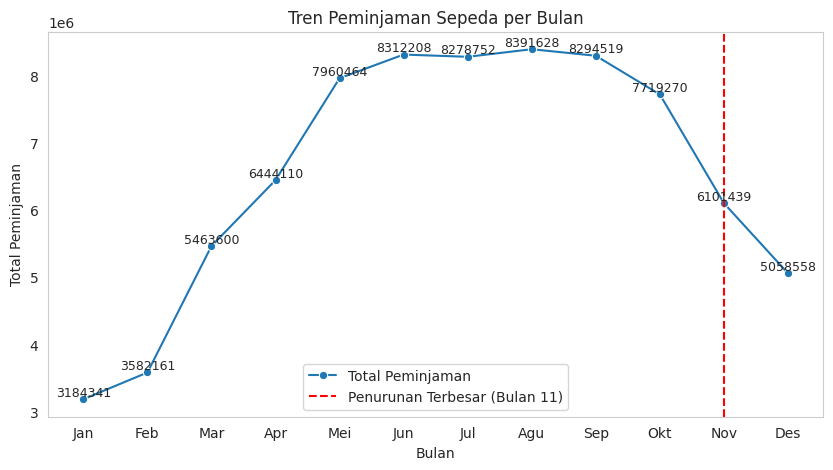

In [39]:
# Mengelompokkan data berdasarkan bulan dan menghitung total peminjaman sepeda
monthly_trend = df.groupby('mnth_x')['cnt_x'].sum().reset_index()

# Menghitung perubahan jumlah peminjaman dari bulan ke bulan
monthly_trend['change'] = monthly_trend['cnt_x'].diff()

# Menentukan bulan dengan penurunan peminjaman terbesar
month_with_biggest_drop = monthly_trend.loc[monthly_trend['change'].idxmin(), 'mnth_x']

# Membuat plot tren peminjaman sepeda per bulan
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trend, x='mnth_x', y='cnt_x', marker='o', label='Total Peminjaman')

# Menandai bulan dengan penurunan peminjaman terbesar
plt.axvline(x=month_with_biggest_drop, color='red', linestyle='--', label=f'Penurunan Terbesar (Bulan {month_with_biggest_drop})')

# Menambahkan label sumbu dan judul
plt.xlabel('Bulan')
plt.ylabel('Total Peminjaman')
plt.title('Tren Peminjaman Sepeda per Bulan')

# Menyesuaikan tampilan sumbu x dengan label bulan
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])

# Menampilkan jumlah peminjaman untuk setiap bulan pada grafik
for index, row in monthly_trend.iterrows():
    plt.text(row['mnth_x'], row['cnt_x'], f'{int(row["cnt_x"])}', ha='center', va='bottom', fontsize=9)

# Menambahkan legenda dan grid
plt.legend()
plt.grid()

# Menampilkan plot
plt.show()


### Pertanyaan 2: Perbandingan rata-rata peminjaman sepeda berdasarkan hari kerja dan libur ?

<ipython-input-37-f9f1be891ff1>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="workingday_x", y="cnt_x", data=avg_rentals, palette=colors)


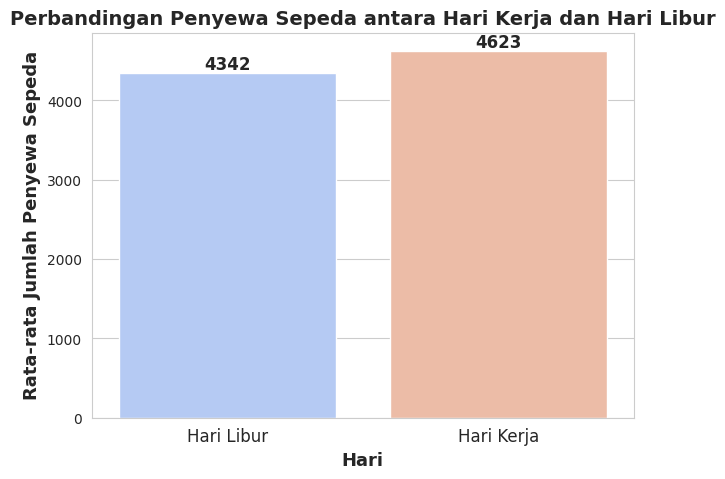

In [37]:

# Menghitung rata-rata jumlah peminjaman sepeda berdasarkan hari kerja/libur
avg_rentals = df.groupby("workingday_x")["cnt_x"].mean().reset_index()

# Membuat plot lebih menarik
plt.figure(figsize=(7, 5))
sns.set_style("whitegrid")
colors = sns.color_palette("coolwarm", n_colors=2)

ax = sns.barplot(x="workingday_x", y="cnt_x", data=avg_rentals, palette=colors)

# Menambahkan label pada batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

# Mengatur sumbu dan judul
plt.xticks(ticks=[0, 1], labels=["Hari Libur", "Hari Kerja"], fontsize=12)
plt.xlabel("Hari", fontsize=13, fontweight="bold")
plt.ylabel("Rata-rata Jumlah Penyewa Sepeda", fontsize=13, fontweight="bold")
plt.title("Perbandingan Penyewa Sepeda antara Hari Kerja dan Hari Libur", fontsize=14, fontweight="bold")
plt.show()

**Insight:**
- Peminjaman sepeda mengalami penurunan pada bulan 11 yaitu peminjaman berkurang 183320 dari bulan sebelumnya
- Berdasarkan analisis ini rata-rata jumlah penyewa sepeda pada hari kerja lebih tinggi dibandingkan pada hari libur.
Perbedaan ini menunjukkan bahwa sepeda lebih sering digunakan sebagai alat transportasi untuk aktivitas harian seperti bekerja atau sekolah.

## Analisis Lanjutan (Opsional)

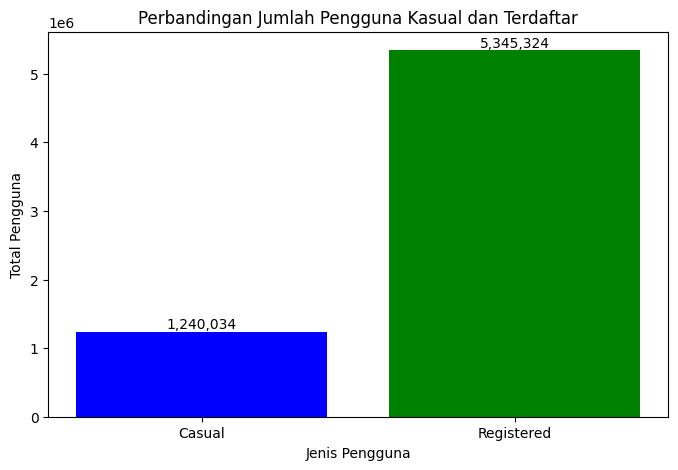

In [ ]:

# Menghitung jumlah total pengguna kasual dan pengguna terdaftar
casual_user = df['casual'].sum()
registered_user = df['registered'].sum()

# Membuat bar chart
plt.figure(figsize=(8, 5))
plt.bar(['Casual', 'Registered'], [casual_user, registered_user], color=['blue', 'green'])

# Menambahkan label dan judul
plt.xlabel('Jenis Pengguna')
plt.ylabel('Total Pengguna')
plt.title('Perbandingan Jumlah Pengguna Kasual dan Terdaftar')

# Menampilkan jumlah di atas setiap batang
for i, val in enumerate([casual_user, registered_user]):
    plt.text(i, val, f'{val:,}', ha='center', va='bottom', fontsize=10)

# Menampilkan plot
plt.show()


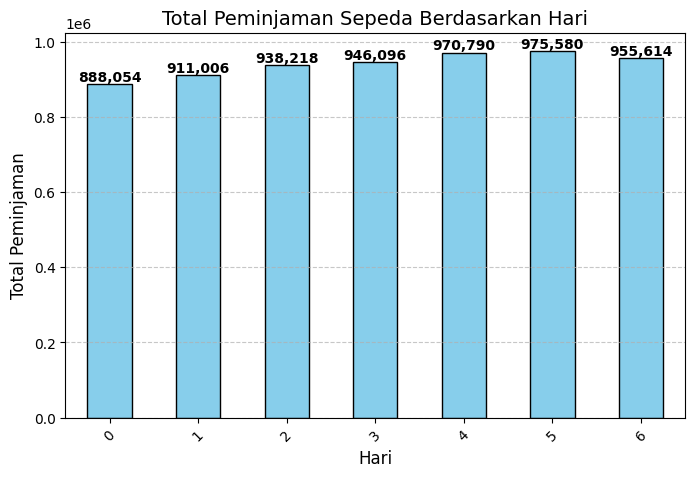

In [ ]:
#Total peminjaman sepeda berdasarkan hari
hari=df.groupby('weekday')['cnt'].sum()
# Membuat plot
plt.figure(figsize=(8, 5))
ax = hari.plot(kind='bar', color='skyblue', edgecolor='black')

# Menambahkan label jumlah di atas setiap batang
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}',  # Format angka tanpa desimal
                (p.get_x() + p.get_width() / 2, p.get_height()),  # Posisi teks
                ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Menambahkan judul dan label
plt.title('Total Peminjaman Sepeda Berdasarkan Hari', fontsize=14)
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Total Peminjaman', fontsize=12)
plt.xticks(rotation=45)

# Menampilkan grid garis horizontal
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menampilkan plot
plt.show()

In [41]:
#export data
df.to_csv('main-data.csv', index=False)

**Insight:**
- Berdasarkan grafik ini menunujukkan total peminjaman dilakukan oleh user yang sudah terdaftar
**Rekomendasi:**
- Strategi yang dapat digunakan untuk mendorong pengguna kasual agar mendaftar adalah dengan menawarkan diskon atau promosi menarik yang dapat meningkatkan minat mereka untuk berlangganan


## Conclusion

- Conclution pertanyaan 1 : Berdasarkan tren peminjaman sepeda per bulan, jumlah peminjaman mengalami peningkatan dari Februari hingga Juni. Pada periode Juni hingga Agustus, jumlah peminjaman naik turun. Penurunan mulai terjadi sejak September, dengan penurunan paling signifikan terjadi pada bulan November

- Conclution pertanyaan 2 : Penggunaan sepeda cenderung lebih tinggi pada hari kerja, yang mungkin disebabkan oleh kebutuhan transportasi harian.

Rekomendasi
1.   Program Khusus

Untuk meningkatkan penggunaan sepeda di hari libur, bisa diadakan program promosi atau diskon khusus pada akhir pekan.

2.   Peningkatan Fasilitas

Perusahaan atau penyedia layanan bisa menambah jumlah sepeda pada hari kerja untuk mengakomodasi tingginya permintaan.

3.  Menyediakan Informasi Cuaca

Dengan menampilkan prakiraan cuaca pada aplikasi atau platform penyewaan sepeda

